In [1]:
import numpy as np
import matplotlib.pyplot as plt
from activations import Activation
from nn import Layer, NeuralNetwork

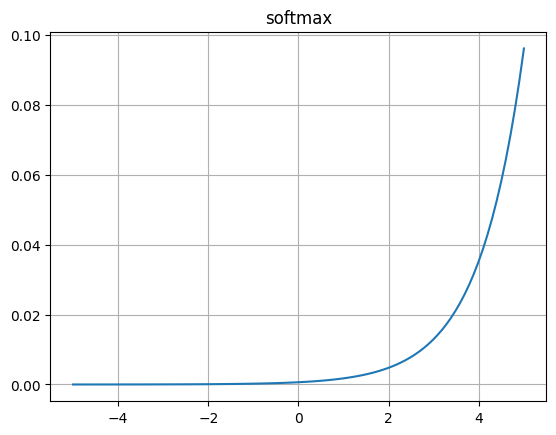

In [2]:
activation = Activation("softmax")
x = np.linspace(-5,5,100)
y = activation.function(x)
plt.plot(x, y)
plt.title("softmax")
plt.grid(True)
plt.show()

In [3]:
from nn import Layer
np.random.seed(42)

L1 = Layer(1, 2, 5, "random", "softmax")

In [4]:
x = np.random.uniform(low=1, high=7, size=(2, 1))
x

array([[2.0909498 ],
       [2.10042706]])

In [5]:
h = L1.forward(x)
print(f"shape {h.shape}")
h

shape (5, 1)


array([[0.19769526],
       [0.20536273],
       [0.19430536],
       [0.20610481],
       [0.19653184]])

In [6]:
np.sum(h) # works as intended - the activation was softmax and indeed the entries sum to 1

1.0

In [7]:
nn = NeuralNetwork(weight_init="random",
                   layer_sizes=[2,4,8,16,16,8,4],
                   activations=["softmax" for _ in range(6)])

In [8]:
y = nn.forward(x)
y

array([[0.24917347],
       [0.24985374],
       [0.25064953],
       [0.25032326]])

In [9]:
np.sum(y)

1.0

In [10]:
from optimizers import Optimizer

In [109]:
optimizer_choices = ["sgd", "momentum", "nag", "rmsprop", "adam", "nadam"]

theta = np.array([4.0, 4.0])

def grad(theta):
    return 2*(theta*np.array([1, 5]))
dTheta = grad(theta)

optimizers = dict()

for optimizer_choice in optimizer_choices:
    print(optimizer_choice)
    if optimizer_choice == "momentum" or optimizer_choice == "nag":
        beta = 0.9
        optimizers[optimizer_choice] = Optimizer(theta=theta.copy(),
                                             learning_rate=0.03,
                                             type=optimizer_choice,
                                             beta=beta)
    elif optimizer_choice == "rmsprop":
        beta = 0.9
        epsilon = 1e-6
        optimizers[optimizer_choice] = Optimizer(theta=theta.copy(),
                                             learning_rate=0.03,
                                             type=optimizer_choice,
                                             beta=beta,
                                             epsilon=epsilon)
    elif optimizer_choice == "adam" or optimizer_choice == "nadam":
        beta1 = 0.9
        beta2 = 0.5
        epsilon = 1e-6
        optimizers[optimizer_choice] = Optimizer(theta=theta.copy(),
                                             learning_rate=0.03,
                                             type=optimizer_choice,
                                             beta1=beta1,
                                             beta2=beta2,
                                             epsilon=epsilon)
    else:
        optimizers[optimizer_choice] = Optimizer(theta=theta.copy(),
                                             learning_rate=0.03,
                                             type=optimizer_choice)


sgd
{}
momentum
{'beta': 0.9}
nag
{'beta': 0.9}
rmsprop
{'beta': 0.9, 'epsilon': 1e-06}
adam
{'beta1': 0.9, 'beta2': 0.5, 'epsilon': 1e-06}
nadam
{'beta1': 0.9, 'beta2': 0.5, 'epsilon': 1e-06}


In [110]:
history = dict()

for opt_name, optimizer in optimizers.items():
    print(f"Working with {opt_name} optimizer")
    if opt_name not in history.keys():
        history[opt_name] = [optimizer.theta.copy()]
    print(f"\ti = {0}: {history[opt_name]}")

    for i in range(1, 100):
        optimizer.update(grad(optimizer.theta))
        history[opt_name].append(optimizer.theta.copy())
        print(f"\ti = {i}: {history[opt_name]}")
    
    print()

# for i in range(5):
#     print(f"i = {i}")
#     for opt_name, optimizer in optimizers.items():
#         if opt_name not in history.keys():
#             history[opt_name] = [optimizer.theta]
        
#         optimizer.update(grad(optimizer.theta))
#         history[opt_name].append(optimizer.theta)
#         print(history[opt_name])
#     print()

Working with sgd optimizer
	i = 0: [array([4., 4.])]
	i = 1: [array([4., 4.]), array([3.76, 2.8 ])]
	i = 2: [array([4., 4.]), array([3.76, 2.8 ]), array([3.5344, 1.96  ])]
	i = 3: [array([4., 4.]), array([3.76, 2.8 ]), array([3.5344, 1.96  ]), array([3.322336, 1.372   ])]
	i = 4: [array([4., 4.]), array([3.76, 2.8 ]), array([3.5344, 1.96  ]), array([3.322336, 1.372   ]), array([3.12299584, 0.9604    ])]
	i = 5: [array([4., 4.]), array([3.76, 2.8 ]), array([3.5344, 1.96  ]), array([3.322336, 1.372   ]), array([3.12299584, 0.9604    ]), array([2.93561609, 0.67228   ])]
	i = 6: [array([4., 4.]), array([3.76, 2.8 ]), array([3.5344, 1.96  ]), array([3.322336, 1.372   ]), array([3.12299584, 0.9604    ]), array([2.93561609, 0.67228   ]), array([2.75947912, 0.470596  ])]
	i = 7: [array([4., 4.]), array([3.76, 2.8 ]), array([3.5344, 1.96  ]), array([3.322336, 1.372   ]), array([3.12299584, 0.9604    ]), array([2.93561609, 0.67228   ]), array([2.75947912, 0.470596  ]), array([2.59391038, 0.32941

In [118]:
x = np.linspace(-4.1, 4.1, 100)

In [119]:
X, Y = np.meshgrid(x,x) # grid of thetas over [-0.5, 4.1]x[-0.5, 4.1]

In [120]:
X.shape

(100, 100)

In [121]:
Y.shape

(100, 100)

In [122]:
def f(x, y):
    return x**2 + 5*y**2

In [123]:
len(history)

6

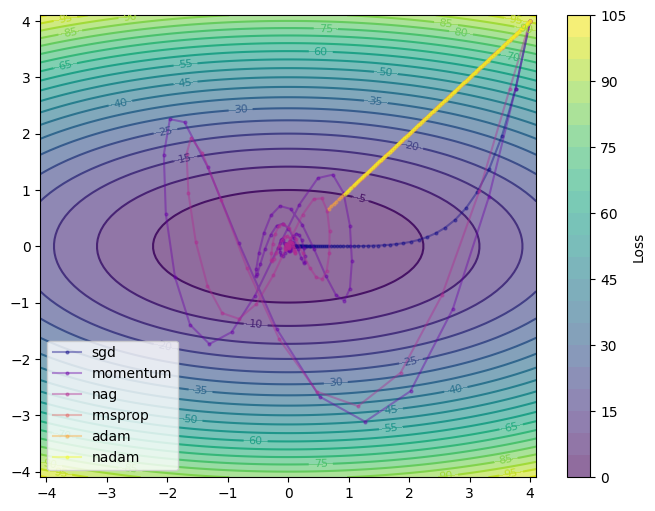

In [124]:
Z = f(X, Y) # lossbowl
plt.figure(figsize=(8,6))
contours = plt.contour(X, Y, Z, levels=20, cmap="viridis")
plt.contourf(X, Y, Z, levels=20, cmap="viridis", alpha=0.6)
plt.colorbar(label="Loss")
plt.clabel(contours, inline=True, fontsize=8)

colors = plt.cm.plasma(np.linspace(0, 1, len(history)))

for i, key_value_pair in enumerate(history.items()):
    opt_name, seq = key_value_pair
    seq = np.array(seq)
    plt.plot(seq[:, 0], seq[:, 1], marker='o', color=colors[i], label=opt_name, markersize=2, alpha=0.4)
plt.legend()
plt.show()